<a href="https://colab.research.google.com/github/namanyadav2706/DataScience-Projects/blob/main/1_Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import yfinance as yf #yahoo finance
import plotly.graph_objects as go
import plotly.express as px
import datetime
from datetime import date, timedelta

In [ ]:
today=date.today() ## to get today's date
end_date=today.strftime('%Y-%m-%d')  ## converting date into string

start_date=(today-timedelta(days=365)).strftime('%Y-%m-%d')  ## to get the date of 365th day from today

In [ ]:
df=yf.download('TSLA',start=start_date,end=end_date) ## to download the data using yahoo finance, TSLA --> Tesla

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-10,253.199997,254.203339,244.839996,245.423340,245.423340,45552600
2021-09-13,246.736664,248.259995,236.283340,247.666672,247.666672,68857500
2021-09-14,247.523331,251.490005,245.466660,248.163330,248.163330,55574700
2021-09-15,248.333328,252.286667,246.119995,251.943329,251.943329,46073100
2021-09-16,250.943329,252.970001,249.203339,252.330002,252.330002,41770200


In [ ]:
df['Date']=df.index  ## crate a new column for date

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2021-09-10,253.199997,254.203339,244.839996,245.423340,245.423340,45552600,2021-09-10
2021-09-13,246.736664,248.259995,236.283340,247.666672,247.666672,68857500,2021-09-13
2021-09-14,247.523331,251.490005,245.466660,248.163330,248.163330,55574700,2021-09-14
2021-09-15,248.333328,252.286667,246.119995,251.943329,251.943329,46073100,2021-09-15
2021-09-16,250.943329,252.970001,249.203339,252.330002,252.330002,41770200,2021-09-16


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Date'], dtype='object')

In [ ]:
df=df[['Date','Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']] ## set date column at 0th index

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-09-10,2021-09-10,253.199997,254.203339,244.839996,245.423340,245.423340,45552600
2021-09-13,2021-09-13,246.736664,248.259995,236.283340,247.666672,247.666672,68857500
2021-09-14,2021-09-14,247.523331,251.490005,245.466660,248.163330,248.163330,55574700
2021-09-15,2021-09-15,248.333328,252.286667,246.119995,251.943329,251.943329,46073100
2021-09-16,2021-09-16,250.943329,252.970001,249.203339,252.330002,252.330002,41770200


In [ ]:
df.reset_index(drop=True,inplace=True) ## to remove the date as index

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-10,253.199997,254.203339,244.839996,245.423340,245.423340,45552600
1,2021-09-13,246.736664,248.259995,236.283340,247.666672,247.666672,68857500
2,2021-09-14,247.523331,251.490005,245.466660,248.163330,248.163330,55574700
3,2021-09-15,248.333328,252.286667,246.119995,251.943329,251.943329,46073100
4,2021-09-16,250.943329,252.970001,249.203339,252.330002,252.330002,41770200


# CandleStick Chart

In [ ]:
figure = go.Figure(data=[go.Candlestick(x=df["Date"],
                                        open=df["Open"], high=df["High"],
                                        low=df["Low"], close=df["Close"])])
figure.update_layout(title = "Tesla Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

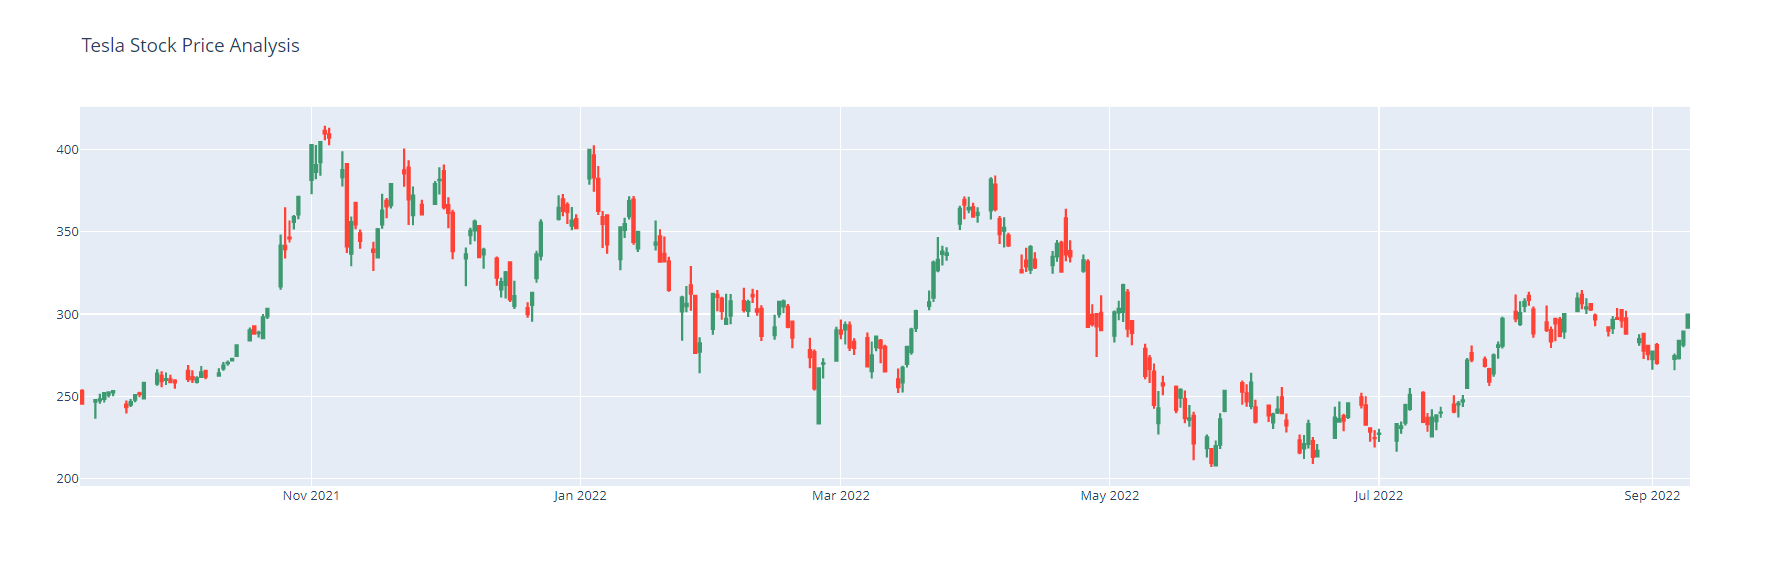

# Bar Plot

In [ ]:
figure = px.bar(df, x = "Date", y= "Volume")
figure.show()

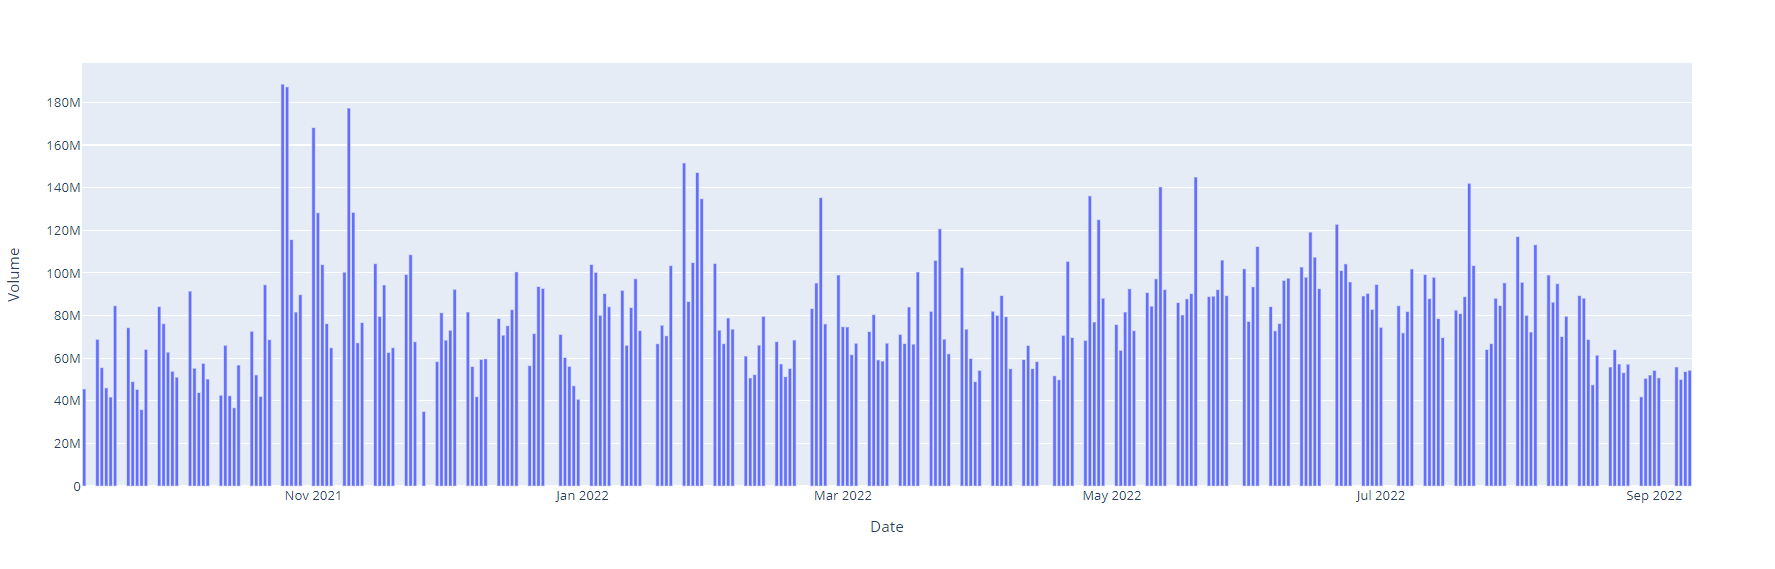

# Line Plot with Range Slider 

In [ ]:
figure = px.line(df, x='Date', y='Close', 
                 title='Analysis with Rangeslider')
figure.update_xaxes(rangeslider_visible=True)
figure.show()

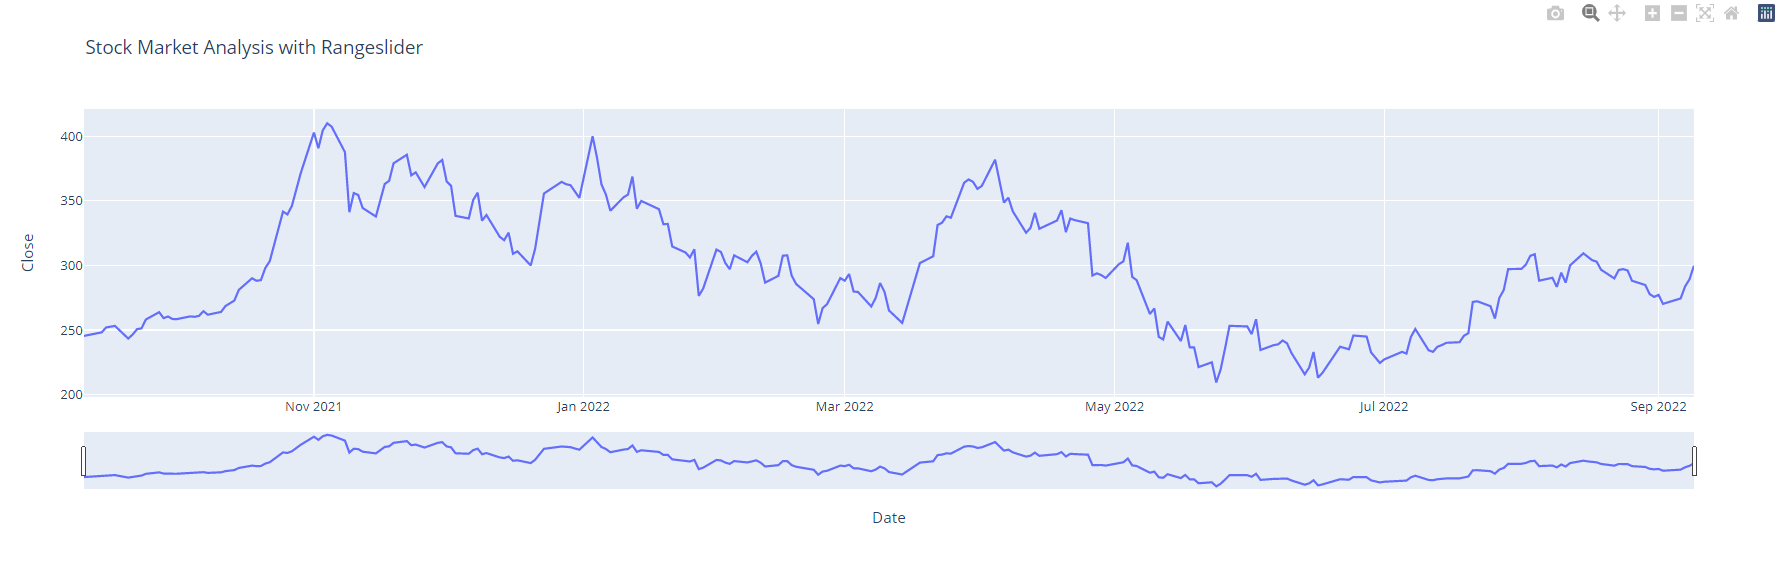

# Line Plot with Time Period Selector

In [ ]:
figure = px.line(df, x='Date', y='Close', 
                 title='Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
figure.show()

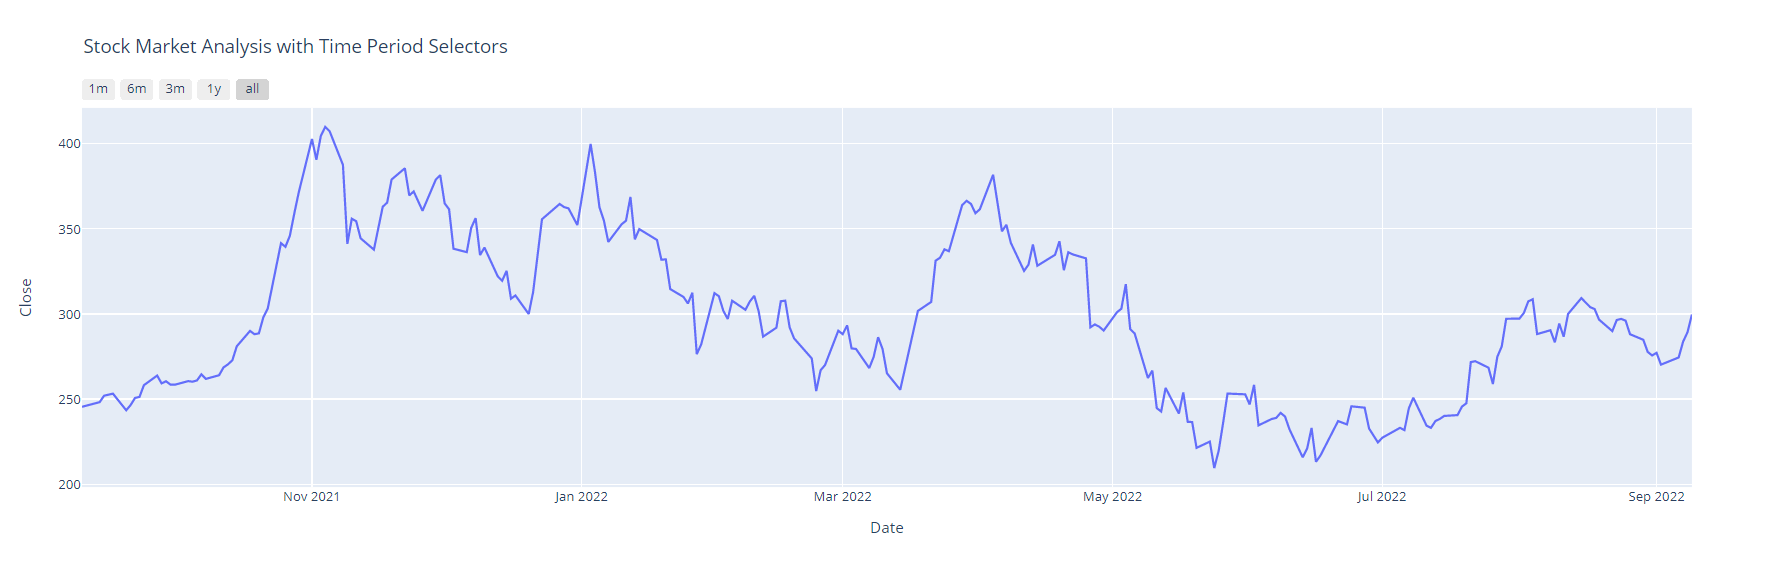

# Remove Hodlidays and Weekends

In [ ]:
figure = px.bar(df, x='Date', y='Open', range_x=['2021-09-10', '2022-09-09'],
                 title="Hiding Weekend Gaps")
figure.update_xaxes(
    rangebreaks=[
        dict(bounds=["sat", "mon"]), ## weekends
        dict(values=["2021-11-25",'2021-12-24','2022-01-17' ,"2022-01-01"]) ## Perticular dates
    ]
)
figure.show()

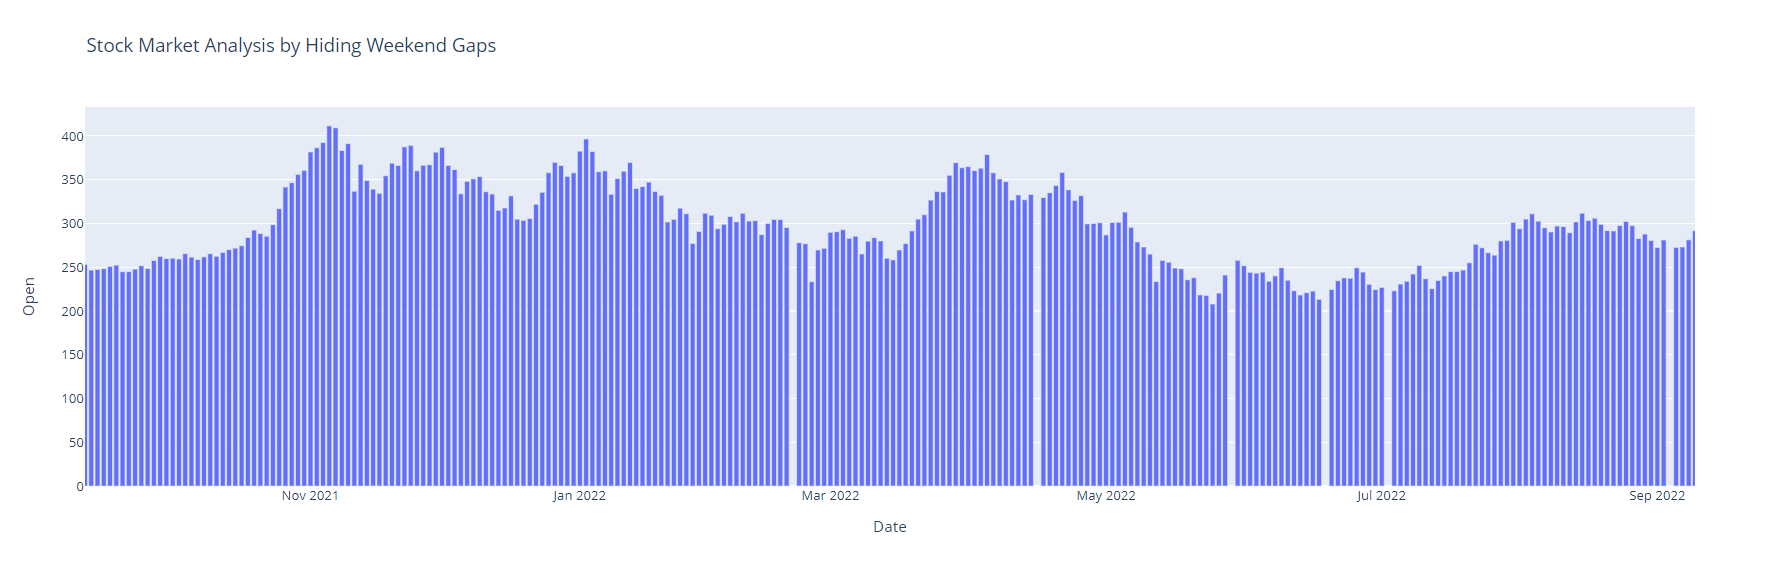

# Resources & More Info

Plotly: https://plotly.com/python/time-series/

Python DateTime: https://docs.python.org/3/library/datetime.html?highlight=strftime#datetime.date.strftime

Yahoo Finance: https://pypi.org/project/yfinance/

